# **EDA**

In [1]:
! pip install soundata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.0 MB/s eta 0:00:00
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64900 sha256=f596fe26d19ad3d46826f458105431

In [2]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data

5.61GB [05:09, 19.5MB/s]                            
1.15MB [00:01, 789kB/s]                             
100%|██████████| 8732/8732 [00:44<00:00, 195.78it/s]

Clip(
  audio_path="/root/sound_datasets/urbansound8k/audio/fold2/203929-7-9-19.wav",
  clip_id="203929-7-9-19",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_time:

In [3]:
! pip install librosa

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import IPython.display as ipd
import librosa
import librosa.display

In [3]:
# dog sound
filename='/root/sound_datasets/urbansound8k/audio/fold1/101415-3-0-2.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

NameError: name 'plt' is not defined

In [7]:
sample_rate

22050

In [4]:
!pip install scipy --upgrade
from scipy.io import wavfile as wav
wsr, aud = wav.read(filename)

In [9]:
wsr

48000

In [10]:
aud

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [11]:
data

array([-0.00011485, -0.00017083, -0.00017736, ..., -0.04609928,
       -0.04609471, -0.05099387], dtype=float32)

In [5]:
import pandas as pd
csv='/root/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv'
metadata=pd.read_csv(csv)

In [13]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
# check whether dataset is imbalanced or not
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

# **Data Preprocessing**

In [6]:
aud_fil_path='/root/sound_datasets/urbansound8k/audio/fold5/100263-2-0-117.wav'

In [7]:
import librosa
import pandas as pd
librosa_dat,librosa_sr=librosa.load(aud_fil_path)
print(librosa_dat)

[ 0.00274057  0.00363865  0.00230643 ... -0.00752703 -0.00462696
  0.00097316]


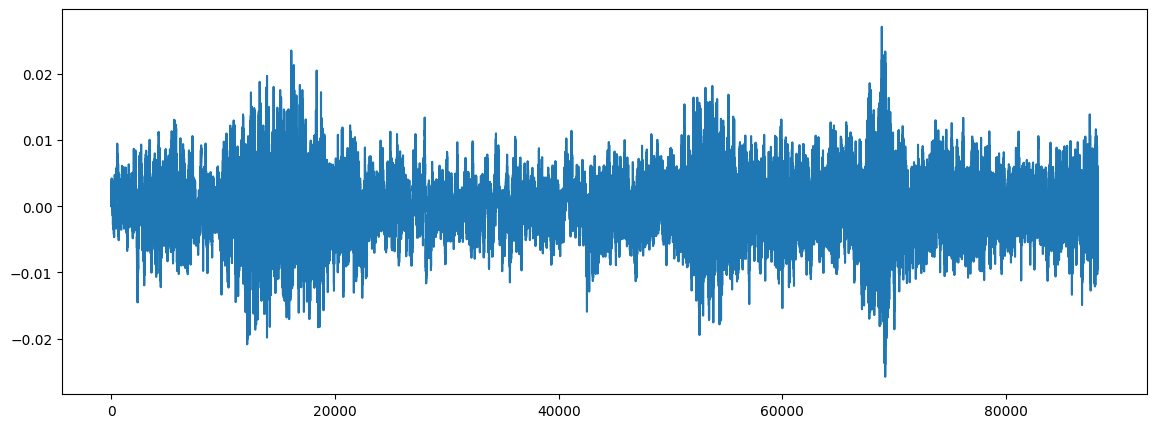

In [11]:
plt.figure(figsize=(14,5))
plt.plot(librosa_dat)

In [12]:
# Observation
# librosa converts signal to mono, meaning the channel will always be one

In [13]:
## lets read with scipy
wsr,wa=wav.read(aud_fil_path)
wa

array([[ 171,   63],
       [ 157,   86],
       [ 130,   96],
       ...,
       [  70, -205],
       [ 202, -159],
       [ 283,  -81]], dtype=int16)

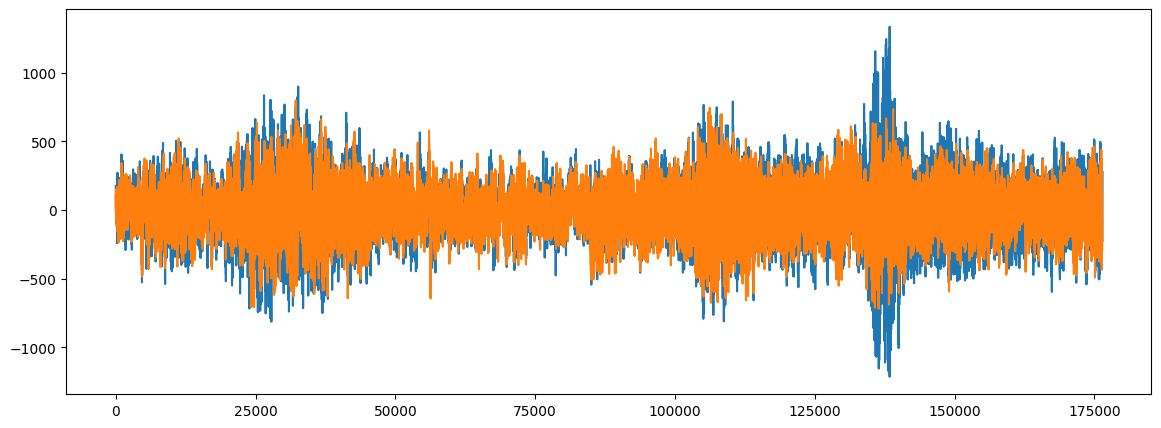

In [14]:
plt.figure(figsize=(14,5))
plt.plot(wa)

## Extract Features


* using Mel-Frequency Cepstral Coefficients(MFCC) from audio samples to analyse frequency and time characterstics
* MFCC summarizes the frequency distribution across window size which allow us to identify features for classification  



In [15]:
mfccs=librosa.feature.mfcc(y=librosa_dat,sr=librosa_sr,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [16]:
mfccs

array([[-4.8605615e+02, -4.4730469e+02, -4.4184772e+02, ...,
        -4.2249933e+02, -4.1990128e+02, -4.3479315e+02],
       [ 9.0492447e+01,  9.8961349e+01,  9.8793579e+01, ...,
         7.7359352e+01,  7.3746567e+01,  7.3074303e+01],
       [-1.6820301e+01, -1.2406603e+01, -1.5042484e+01, ...,
        -3.1668331e+01, -2.8136139e+01, -2.9968552e+01],
       ...,
       [ 4.1776476e+00,  1.9898291e+00,  3.1377463e+00, ...,
        -1.1930805e+01, -7.6285944e+00, -3.6759291e+00],
       [ 2.8205132e-01, -6.1229098e-01,  1.0903208e+00, ...,
         1.2085972e+01,  1.3864525e+01,  1.1060386e+01],
       [-8.9769512e-01,  3.0010605e+00,  5.2202439e+00, ...,
         1.2405752e+01,  9.6569347e+00,  5.0198421e+00]], dtype=float32)

In [17]:
import os
audio_dataset_path='/root/sound_datasets/urbansound8k/audio/'
metadata=pd.read_csv('/root/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [24]:
! pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.1 MB/s eta 0:00:00


In [18]:
def features_extractor(file_name):
  audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
  mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
  return mfccs_scaled_features

In [27]:
! pip install resampy

In [28]:
import resampy

In [19]:
import numpy as np
from tqdm import tqdm
import resampy

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
  file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
  final_class_labels=row["class"]
  data=features_extractor(file_name)
  extracted_features.append([data,final_class_labels])

3555it [05:54, 11.13it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [13:34, 11.25it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [14:11, 10.26it/s]


In [20]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38528, -53.282906,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.7912, 121.38421, -46.520657, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60355, 113.685425, -52.402214, 60.302044...",children_playing


In [21]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(8732, 40)

In [22]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [23]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [24]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([[-1.3110471e+02,  1.1250591e+02, -2.2574696e+01, ...,
         3.2466519e+00, -1.3690233e+00,  2.7557547e+00],
       [-1.3670342e+01,  9.1085083e+01, -7.7927332e+00, ...,
        -3.2530518e+00, -5.2774525e+00, -1.5569724e+00],
       [-4.9871544e+01,  2.6535317e-01, -2.0500937e+01, ...,
         2.8545949e+00, -1.6092046e+00,  3.5248060e+00],
       ...,
       [-4.2701236e+02,  9.2623039e+01,  3.1293974e+00, ...,
         7.4264121e-01,  7.3349106e-01,  7.1100926e-01],
       [-1.4575461e+02,  1.3626578e+02, -3.3515522e+01, ...,
         1.4681191e+00, -2.0091696e+00, -8.8218242e-01],
       [-4.2103134e+02,  2.1065454e+02,  3.4906633e+00, ...,
        -5.3888674e+00, -3.3713613e+00, -1.5665109e+00]], dtype=float32)

In [26]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
X_train.shape

(6985, 40)

In [28]:
X_test.shape

(1747, 40)

In [29]:
y_train.shape

(6985, 10)

In [30]:
y_test.shape

(1747, 10)

In [31]:
#Model Creation

In [32]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [40]:
### No of classes
num_labels=y.shape[1]
num_labels

10

In [36]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4100      
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 activation_4 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)              

In [38]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 10.9047 - accuracy: 0.1154
Epoch 1: val_loss improved from inf to 2.29201, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 7s 8ms/step - loss: 10.9047 - accuracy: 0.1154 - val_loss: 2.2920 - val_accuracy: 0.1105
Epoch 2/100
 21/219 [=>............................] - ETA: 1s - loss: 2.7349 - accuracy: 0.1324

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


214/219 [============================>.] - ETA: 0s - loss: 2.5177 - accuracy: 0.1196
Epoch 2: val_loss improved from 2.29201 to 2.28171, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 2.5140 - accuracy: 0.1198 - val_loss: 2.2817 - val_accuracy: 0.1093
Epoch 3/100
209/219 [===========================>..] - ETA: 0s - loss: 2.3548 - accuracy: 0.1238
Epoch 3: val_loss improved from 2.28171 to 2.27473, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.3530 - accuracy: 0.1233 - val_loss: 2.2747 - val_accuracy: 0.1093
Epoch 4/100
210/219 [===========================>..] - ETA: 0s - loss: 2.2939 - accuracy: 0.1207
Epoch 4: val_loss improved from 2.27473 to 2.26996, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.2948 - accuracy: 0.1215 - val_loss: 2.2700 - val_accuracy: 0.1139
Epoch 5

In [41]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7510017156600952


In [45]:
fn='/root/sound_datasets/urbansound8k/audio/fold1/101415-3-0-2.wav'
pred_feature=features_extractor(fn)
prediction = model.predict(pred_feature.reshape(1,-1)) # Use model.predict
predicted_class = np.argmax(prediction) # Get index of highest probability which is the predicted class
print(predicted_class)

1/1 [==============================] - 0s 32ms/step
3


In [48]:
class1=labelencoder.inverse_transform([predicted_class])
class1

array(['dog_bark'], dtype='<U16')